In [1]:
import geopandas as gpd
import pandas as pd
import os, sys
import matplotlib.pyplot as plt

In [2]:
!ls ../

DL_FIRE_M6_50639
DL_FIRE_M6_50640
DL_FIRE_M6_50641
DL_FIRE_M6_50642
DL_FIRE_M6_50643
DL_FIRE_M6_50644
DL_FIRE_M6_50645
DL_FIRE_M6_50646
DL_FIRE_M6_50647
DL_FIRE_M6_50648
DL_FIRE_M6_50649
DL_FIRE_M6_50651
DL_FIRE_M6_50652
DL_FIRE_M6_50653
DL_FIRE_M6_50654
DL_FIRE_M6_50655
DL_FIRE_M6_50656
DL_FIRE_M6_50657
DL_FIRE_M6_50658
notebooks


In [3]:
sample_file = '../DL_FIRE_M6_50639/fire_archive_M6_50639.shp'
df = gpd.read_file(sample_file)
df.head()

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,TYPE,geometry
0,-5.9659,147.1301,310.2,3.9,1.8,2000-11-01,0013,Terra,MODIS,0,6.2,290.0,35.1,D,0,POINT (147.1301 -5.9659)
1,-18.6804,145.5470,317.3,2.9,1.6,2000-11-01,0016,Terra,MODIS,54,6.2,299.4,32.8,D,0,POINT (145.547 -18.6804)
2,-18.4459,144.8904,324.6,3.2,1.7,2000-11-01,0016,Terra,MODIS,74,6.2,303.1,77.4,D,0,POINT (144.8904 -18.4459)
3,-18.4401,144.8603,317.7,3.3,1.7,2000-11-01,0016,Terra,MODIS,61,6.2,303.2,38.5,D,0,POINT (144.8603 -18.4401)
4,-18.4005,144.9007,318.8,3.2,1.7,2000-11-01,0016,Terra,MODIS,64,6.2,301.5,42.6,D,0,POINT (144.9007 -18.4005)


In [4]:
df.shape

(264718, 16)

In [5]:
acq_times = df.ACQ_TIME.unique()

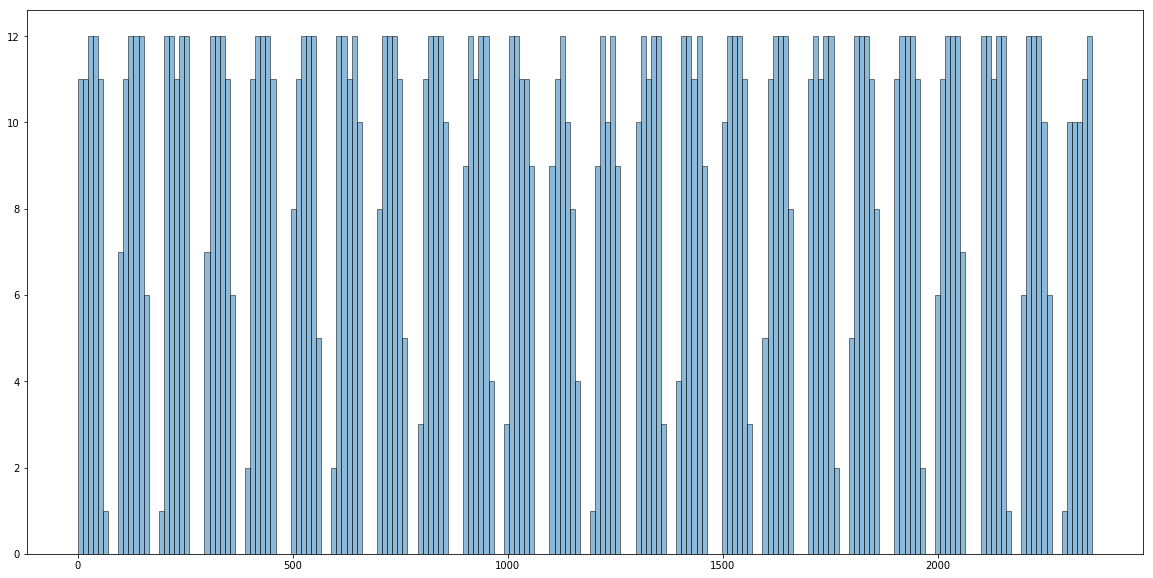

In [15]:
plt.figure(figsize=(20,10))
plt.hist(acq_times.astype('int'), bins=200, alpha=0.5, edgecolor='k');

In [22]:
daynight = list(df.groupby('DAYNIGHT'))
df_day = daynight[0][1]
df_night = daynight[1][1]

In [23]:
df_day.shape, df_night.shape

((222168, 16), (42550, 16))

In [24]:
df_night.DAYNIGHT

172       N
173       N
174       N
175       N
176       N
177       N
537       N
538       N
539       N
540       N
541       N
542       N
543       N
544       N
545       N
546       N
547       N
548       N
549       N
550       N
551       N
552       N
553       N
554       N
555       N
556       N
557       N
558       N
559       N
560       N
         ..
264686    N
264687    N
264688    N
264689    N
264690    N
264691    N
264692    N
264693    N
264694    N
264695    N
264696    N
264697    N
264698    N
264699    N
264700    N
264701    N
264702    N
264703    N
264704    N
264705    N
264706    N
264707    N
264708    N
264709    N
264710    N
264711    N
264712    N
264713    N
264714    N
264715    N
Name: DAYNIGHT, Length: 42550, dtype: object

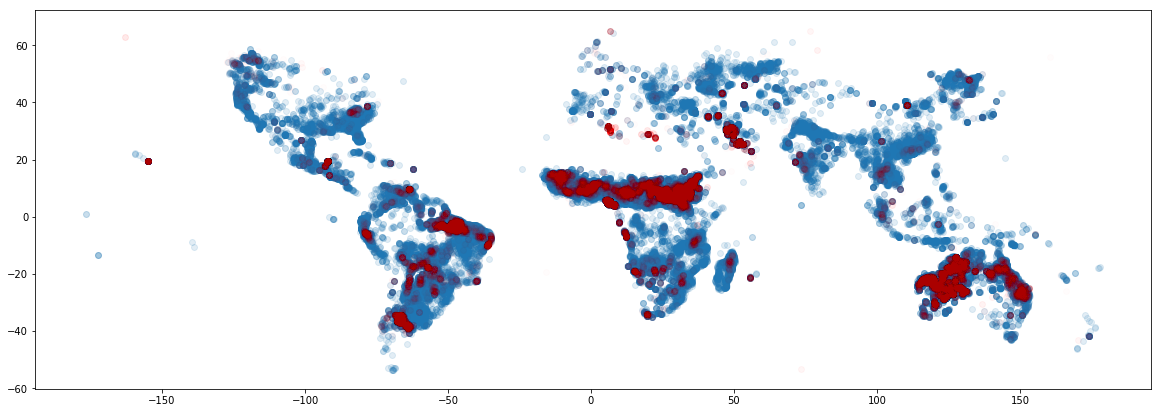

In [34]:
ax = df_day.plot(figsize=(20,10), alpha=0.125);
df_night.plot(figsize=(20,10), alpha=0.0125, color='r', ax=ax);